<a href="https://colab.research.google.com/github/kiing-dom/CS4287/blob/main/Assignment2CNN/CS4287_Assign2_20243561_20250762.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CS4287 CNN**

In [98]:
# 20243561 - Dominion Gbadamosi  --- 20250762 - Dennis Kolomiyets
# Runs

In [99]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import random
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Data Visualization



In [100]:
# using pandas to read the library
dataset = "all_letters_info.csv"
df = pd.read_csv(dataset)

#display the header of the dataset
display(df.head())

,letter,label,file,background
0,а,1,01_01.png,0
1,а,1,01_02.png,0
2,а,1,01_03.png,0
3,а,1,01_04.png,0
4,а,1,01_05.png,0


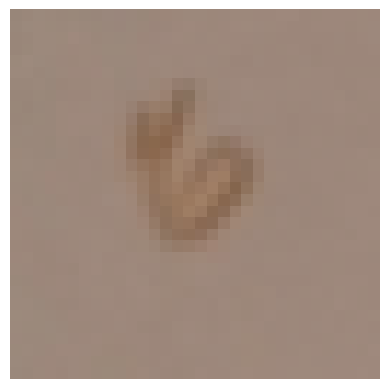

In [101]:
#folder path where the images are stored
images_folder = "all_letters_image/all_letters_image/"

#get list of all image files in the folder
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.jpeg', '.png'))]

#choose a random image
random_image_file = random.choice(image_files)

#create the full path to the random image
random_image_path = os.path.join(images_folder, random_image_file)

#load and display the random image
img = mpimg.imread(random_image_path)

plt.imshow(img)
plt.axis('off')
plt.show()

In [102]:
labels = df['label'] #corresponding to the "label" column in the csv file
file_names = df['file'] #corresponds to the "file" column in the csv file

## Data Preprocessing

In [104]:
# Preprocessing data
le = LabelEncoder()
labels = le.fit_transform(labels)

#Image Preprocessing
images = []

for file_name in file_names:
  # create the full file path
  file_path = os.path.join(images_folder, file_name)

  # load and preprocess the image
  img = tf.keras.preprocessing.image.load_img(file_path, target_size=(32,32))
  img = tf.keras.preprocessing.image.img_to_array(img)
  img = img / 255.0 #Normalization of pixel values to the range [0, 1] to make values more suitable for neural network
  images.append(img)

images = np.array(images)

#splitting the dataset into training & test data
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Adjust num_classes based on the actual number of classes
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=33)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=33)  # Adjust num_classes based on the actual number of classes



## Creating the Model

In [105]:
# Creating A Sequential Model
model = tf.keras.models.Sequential()

# adding a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape = (32, 32, 3)))

#adding a MaxPooling layer to downsample the spatial dimensions
model.add(tf.keras.layers.MaxPooling2D(2, 2))

#adding a convolutional layer with 64 filters and a 3x3 kernel
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))

#adding another MaxPooling layer
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

#flatten the output before deeding it into the dense layers
model.add(tf.keras.layers.Flatten())

#adding a Dense layer with 64 units and ReLU activation
model.add(tf.keras.layers.Dense(64, activation='relu'))

#adding the output layer with as many units as there are classes and softmax
# activation for multiclass classificaiton
model.add(tf.keras.layers.Dense(33, activation='softmax'))  # Assuming there are 33 classes (letters in cyrillic alphabet)

# Compiling the model but including the top 5 accuracy metric
top5_acc = tf.keras.metrics.TopKCategoricalAccuracy(k=5)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', top5_acc])

#display summary of the model
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 2304)              0         
                                                                 
 dense_22 (Dense)            (None, 64)              

## Training & Evaluation

In [106]:
# Assuming X_train_resized and y_train_one_hot are your training data
# Adjust batch_size and epochs as needed
batch_size = 32
epochs = 50

# Train the model
history = model.fit(X_train, y_train_one_hot, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
284/284 [==============================] - 15s 49ms/step - loss: 3.4842 - accuracy: 0.0401 - val_loss: 3.4085 - val_accuracy: 0.0577
Epoch 2/10
284/284 [==============================] - 13s 47ms/step - loss: 3.0573 - accuracy: 0.1480 - val_loss: 2.6175 - val_accuracy: 0.2369
Epoch 3/10
284/284 [==============================] - 13s 45ms/step - loss: 2.3698 - accuracy: 0.3301 - val_loss: 2.1430 - val_accuracy: 0.3893
Epoch 4/10
284/284 [==============================] - 14s 50ms/step - loss: 2.0315 - accuracy: 0.4270 - val_loss: 1.9592 - val_accuracy: 0.4377
Epoch 5/10
284/284 [==============================] - 12s 43ms/step - loss: 1.7918 - accuracy: 0.4933 - val_loss: 1.6997 - val_accuracy: 0.5183
Epoch 6/10
284/284 [==============================] - 12s 41ms/step - loss: 1.5758 - accuracy: 0.5534 - val_loss: 1.5496 - val_accuracy: 0.5469
Epoch 7/10
284/284 [==============================] - 13s 46ms/step - loss: 1.3857 - accuracy: 0.6079 - val_loss: 1.4827 - val_accuracy: